In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import dataiku
from dataiku import pandasutils as pdu
import pandas as pd

In [3]:
img = dataiku.Folder("PSSOcropClass")
img_info=img.get_info()
img_path=img_info['path']
data_path=img_path
print(img_path)
#print(data_path)



import matplotlib.pyplot as plt
import numpy as np
import random
import tensorflow
import splitfolders
import os
from PIL import Image,ImageOps,ImageFilter
from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean
from skimage import io
from skimage.util import crop

import os
import scipy.fftpack
from collections import OrderedDict
from tensorflow.keras.models import Model
import tensorflow as tf
from tensorflow.keras.layers import LeakyReLU,BatchNormalization,Dropout,Dense,Conv2D,Conv2DTranspose,ReLU,UpSampling2D,\
                                    Reshape,Flatten,ZeroPadding2D,Reshape,Input,Add
from tensorflow.keras.losses import MeanSquaredError
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from easydict import EasyDict as edict
from scipy.io import loadmat
from tensorflow.keras import Sequential
from tensorflow.keras.activations import tanh
from tensorflow.keras.optimizers import schedules, Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy,KLDivergence,BinaryCrossentropy,MeanSquaredError,\
                                    CategoricalCrossentropy
import os
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.regularizers import l2
import tensorflow_hub as hub

from sklearn.cluster import KMeans,DBSCAN
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import sklearn

resnet = dataiku.Folder("google_resnet_v2")
resnet_info=resnet.get_info()
resnet_path=resnet_info['path']

effnet = dataiku.Folder("efficientV2")
effnet_info=effnet.get_info()
effnet_path=effnet_info['path']

output = dataiku.Folder("siamout")
output_info=output.get_info()
output_path=output_info['path']
model_path=output_path+"/siam3.h5"

/apps/dataiku/dss_data/managed_folders/DUMMY/fNS2is4T


In [4]:
import cv2 

In [5]:
img1_path=data_path+"/present/12_4_23-fail.png"
#img1=data_path+"/present/10_4_15-fail.png"
img1=cv2.imread(img1_path)
#img1=Image.open(img1)

#imgnp1=np.array(img1)

#imgnp1[1]
img1=cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY) 
#img1=ImageOps.grayscale(img1) 

In [6]:
img1

array([[116, 119, 120, ..., 139, 145, 137],
       [121, 125, 124, ..., 139, 143, 132],
       [132, 135, 135, ..., 136, 139, 129],
       ...,
       [174, 179, 182, ...,  88,  84,  79],
       [177, 180, 182, ...,  88,  83,  80],
       [178, 181, 180, ...,  89,  83,  81]], dtype=uint8)

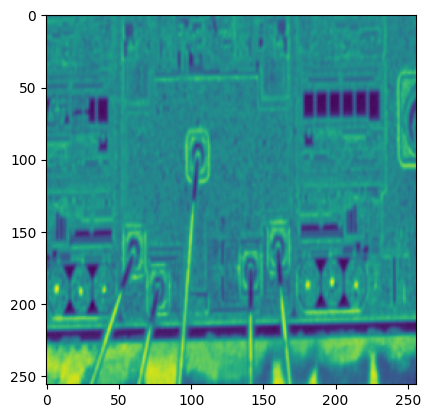

In [7]:
plt.imshow(img1)
#cv2.imshow("img1",img1)
#cv2.imshow("Matches", img1) 

In [8]:
img1.size

65536

In [9]:
img2_path=data_path+"/missing/1_1_1-fail.png"
#img1=data_path+"/present/10_4_15-fail.png"
img2=cv2.imread(img2_path)
#img1=Image.open(img1)

#imgnp1=np.array(img1)

#imgnp1[1]
img2=cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY) 
#img1=ImageOps.grayscale(img1) 

In [10]:
#img2

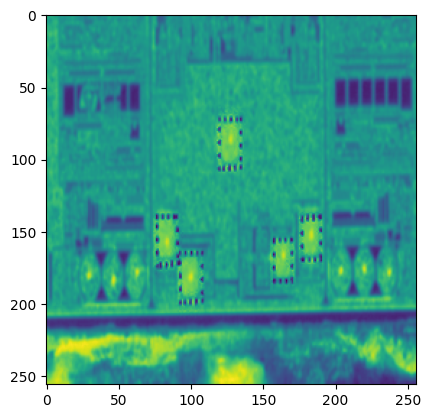

In [11]:
plt.imshow(img2)

In [12]:
img3_path=data_path+"/missing/38_4_19-fail.png"
#img1=data_path+"/present/10_4_15-fail.png"
img3=cv2.imread(img3_path)
#img1=Image.open(img1)

#imgnp1=np.array(img1)

#imgnp1[1]
img3=cv2.cvtColor(img3,cv2.COLOR_BGR2GRAY) 
#img1=ImageOps.grayscale(img1) 

In [13]:
orb = cv2.ORB_create() 
   
# Now detect the keypoints and compute 
# the descriptors for the query image 
# and train image 
queryKeypoints, queryDescriptors = orb.detectAndCompute(img1,None) 
trainKeypoints, trainDescriptors = orb.detectAndCompute(img2,None) 
  
# Initialize the Matcher for matching 
# the keypoints and then match the 
# keypoints 
matcher = cv2.BFMatcher() 
matches = matcher.match(queryDescriptors,trainDescriptors) 
   
# draw the matches to the final image 
# containing both the images the drawMatches() 
# function takes both images and keypoints 
# and outputs the matched query image with 
# its train image 
#final_img = cv2.drawMatches(img, queryKeypoints,  
#img2, trainKeypoints, matches[:20],None) 
   
#final_img = cv2.resize(final_img, (1000,650)) 

In [14]:
#plt.imshow(final_img)

In [15]:
similar_regions = [i for i in matches if i.distance>400]  

In [16]:
d=[]

In [17]:
for i in matches:
    d.append(i.distance)

In [18]:
len(similar_regions) / len(matches)

0.2393617021276596

In [19]:
d

[410.87103271484375,
 410.8576354980469,
 409.7999572753906,
 350.91168212890625,
 360.53570556640625,
 377.485107421875,
 370.0040588378906,
 417.9210510253906,
 302.8910827636719,
 416.47088623046875,
 358.70599365234375,
 386.7583312988281,
 377.7353515625,
 401.73870849609375,
 423.5162353515625,
 400.15997314453125,
 398.4607849121094,
 454.6031188964844,
 326.30047607421875,
 317.2601318359375,
 439.27325439453125,
 431.4649353027344,
 377.58575439453125,
 386.9534912109375,
 271.9117431640625,
 392.3391418457031,
 344.3428649902344,
 381.7892150878906,
 292.2550354003906,
 366.64288330078125,
 429.342529296875,
 434.5894470214844,
 380.2354431152344,
 410.006103515625,
 293.1313781738281,
 389.78582763671875,
 328.5483093261719,
 351.6617736816406,
 405.6143493652344,
 324.9753723144531,
 390.9642028808594,
 398.54486083984375,
 233.73275756835938,
 344.1642150878906,
 372.67681884765625,
 328.5802917480469,
 366.1666259765625,
 322.07452392578125,
 397.4657287597656,
 375.85501

In [20]:
final_img = cv2.drawMatches(img1, queryKeypoints,  
img2, trainKeypoints, matches[:20],None) 
   
final_img = cv2.resize(final_img, (1000,650)) 

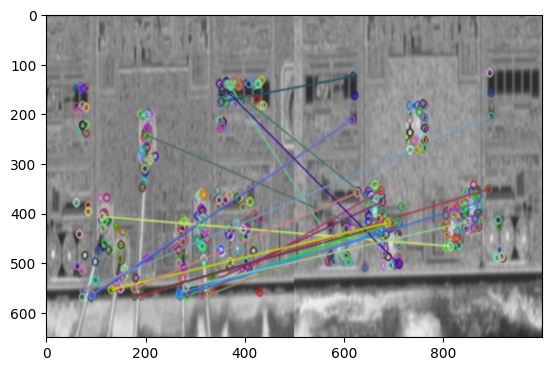

In [21]:
plt.imshow(final_img)

In [22]:
import statistics

In [23]:
from skimage.metrics import structural_similarity

In [24]:
sim, diff = structural_similarity(img1, img2, full=True)

In [25]:
sim

0.20040547242570383

In [26]:
diff

array([[-0.13116555, -0.05998722,  0.03100166, ...,  0.41880969,
         0.39796079,  0.5641109 ],
       [-0.37639502, -0.29389691, -0.15304839, ...,  0.47432971,
         0.47429028,  0.59311886],
       [-0.43252814, -0.33966611, -0.17369602, ...,  0.54379999,
         0.54805916,  0.59622898],
       ...,
       [ 0.32024291,  0.32061777,  0.2341993 , ...,  0.17648065,
         0.18875623,  0.20992861],
       [ 0.47879718,  0.46179114,  0.33301611, ...,  0.19690331,
         0.21624375,  0.24570431],
       [ 0.63320214,  0.60228657,  0.44037789, ...,  0.25344793,
         0.27701702,  0.30645129]])

In [27]:
#cv2.imshow("Matches", final_img) 
folder=data_path+"/present/"

In [28]:
folder

'/apps/dataiku/dss_data/managed_folders/DUMMY/fNS2is4T/present/'

In [29]:
p=[]

In [30]:
for filename in os.listdir(data_path+"/present"):
    print(filename)
    img2_path=data_path+"/present/"+filename
    img2=cv2.imread(img2_path)
    img2=cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
    queryKeypoints, queryDescriptors = orb.detectAndCompute(img1,None) 
    trainKeypoints, trainDescriptors = orb.detectAndCompute(img2,None) 

    matcher = cv2.BFMatcher() 
    matches = matcher.match(queryDescriptors,trainDescriptors) 

    similar_regions = [i for i in matches if i.distance<300]  
    
    p.append(len(similar_regions) / len(matches))

1_2_24-fail.png
3_2_7-fail.png
6_2_3-fail.png
6_2_4-fail.png
2_2_2-fail.png
2_3_1-fail.png
7_1_15-fail.png
7_3_10-fail.png
8_4_3-fail.png
3_4_20-fail.png
7_4_16-fail.png
9_2_24-fail.png
7_1_17-fail.png
10_2_1-fail.png
10_1_23-fail.png
10_4_14-fail.png
10_4_15-fail.png
11_1_1-fail.png
10_2_2-fail.png
11_4_24-fail.png
11_4_7-fail.png
12_4_3-fail.png
9_4_14-fail.png
10_2_15-fail.png
13_2_2-fail.png
12_1_14-fail.png
13_4_15-fail.png
14_1_5-fail.png
15_1_12-fail.png
13_4_12-fail.png
13_4_5-fail.png
16_1_3-fail.png
21_2_18-fail.png
23_2_12-fail.png
13_4_4-fail.png
18_1_8-fail.png
23_2_24-fail.png
19_4_22-fail.png
23_4_2-fail.png
25_2_2-fail.png
23_3_24-fail.png
25_2_9-fail.png
27_4_3-fail.png
24_3_9-fail.png
27_4_5-fail.png
12_4_23-fail.png
27_2_22-fail.png
28_3_8-fail.png
23_3_3-fail.png
31_3_6-fail.png
31_4_24-fail.png
27_4_10-fail.png
32_4_7-fail.png
32_4_11-fail.png
33_2_1-fail.png
34_4_9-fail.png
35_1_11-fail.png
34_2_24-fail.png
36_3_14-fail.png
35_2_4-fail.png
35_3_4-fail.png
38_4_4-f

In [31]:
p

[0.1675531914893617,
 0.08244680851063829,
 0.09308510638297872,
 0.09308510638297872,
 0.09042553191489362,
 0.125,
 0.2047872340425532,
 0.11170212765957446,
 0.10904255319148937,
 0.10106382978723404,
 0.125,
 0.14627659574468085,
 0.12234042553191489,
 0.07712765957446809,
 0.13031914893617022,
 0.13829787234042554,
 0.14893617021276595,
 0.17819148936170212,
 0.0851063829787234,
 0.15159574468085107,
 0.10372340425531915,
 0.13829787234042554,
 0.125,
 0.10638297872340426,
 0.10638297872340426,
 0.10106382978723404,
 0.17287234042553193,
 0.10106382978723404,
 0.10638297872340426,
 0.13031914893617022,
 0.0851063829787234,
 0.125,
 0.19946808510638298,
 0.15159574468085107,
 0.08244680851063829,
 0.10904255319148937,
 0.1196808510638298,
 0.13031914893617022,
 0.08244680851063829,
 0.11436170212765957,
 0.09574468085106383,
 0.09308510638297872,
 0.08244680851063829,
 0.1276595744680851,
 0.05319148936170213,
 1.0,
 0.1356382978723404,
 0.18351063829787234,
 0.12234042553191489,
 

In [32]:
p2=[]

In [33]:
for filename in os.listdir(data_path+"/missing"):
    print(filename)
    #if os.path.exists(img2_path):
        #print("true")
    img2_path=data_path+"/missing/"+filename
    img2=cv2.imread(img2_path)
    img2=cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
    queryKeypoints, queryDescriptors = orb.detectAndCompute(img1,None) 
    trainKeypoints, trainDescriptors = orb.detectAndCompute(img2,None) 

    matcher = cv2.BFMatcher() 
    matches = matcher.match(queryDescriptors,trainDescriptors) 

    similar_regions = [i for i in matches if i.distance<300]  

    p2.append(len(similar_regions) / len(matches))

1_1_2-fail.png
1_2_1-fail.png
1_3_2-fail.png
1_3_1-fail.png
1_4_2-fail.png
1_4_3-fail.png
3_2_22-fail.png
6_1_24-fail.png
7_4_7-fail.png
1_2_2-fail.png
14_4_17-fail.png
38_4_19-fail.png
43_3_1-fail.png
1_4_1-fail.png
51_4_15-fail.png
56_1_1-fail.png
56_1_2-fail.png
8_4_12-fail.png
56_3_1-fail.png
56_2_2-fail.png
56_2_1-fail.png
56_3_2-fail.png
47_4_3-fail.png
56_4_2-fail.png
57_1_24-fail.png
56_4_1-fail.png
16_1_12-fail.png
1_1_1-fail.png


In [34]:
p2

[0.0398936170212766,
 0.05319148936170213,
 0.05053191489361702,
 0.05053191489361702,
 0.026595744680851064,
 0.05585106382978723,
 0.047872340425531915,
 0.08244680851063829,
 0.0398936170212766,
 0.06914893617021277,
 0.06382978723404255,
 0.07180851063829788,
 0.09574468085106383,
 0.06648936170212766,
 0.047872340425531915,
 0.05053191489361702,
 0.0425531914893617,
 0.08244680851063829,
 0.0425531914893617,
 0.05851063829787234,
 0.061170212765957445,
 0.05319148936170213,
 0.02925531914893617,
 0.06382978723404255,
 0.04521276595744681,
 0.05585106382978723,
 0.19680851063829788,
 0.05851063829787234]

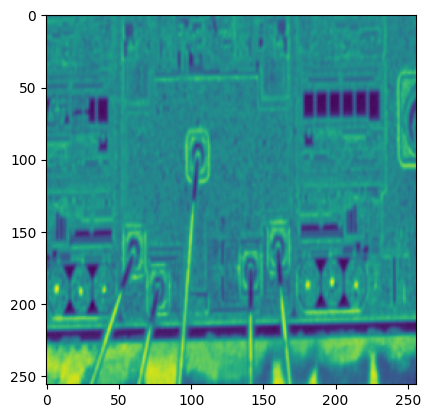

In [35]:
plt.imshow(img1)

In [36]:
im1c =img1[75:125, 90:120]
im1c=cv2.resize(im1c, (30,30))

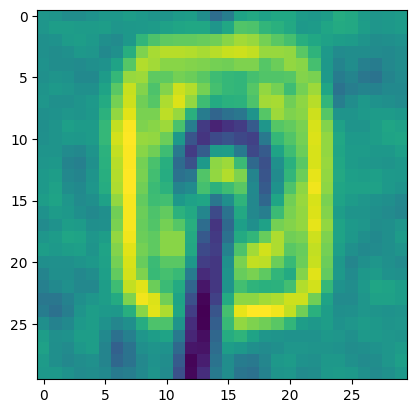

In [37]:
plt.imshow(im1c)

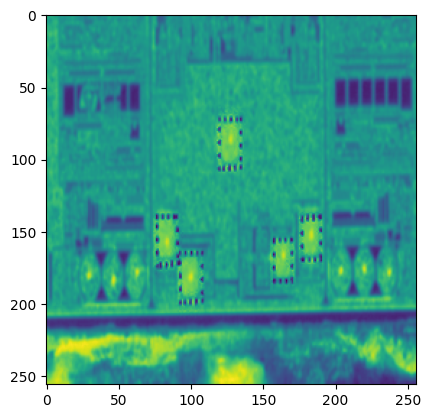

In [38]:
plt.imshow(img2)

In [39]:
im2c =img2[70:110, 110:140]
im2c=cv2.resize(im2c, (30,30))

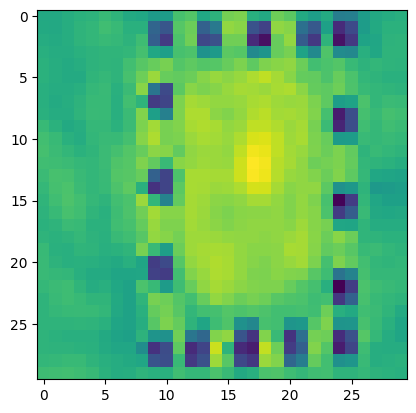

In [40]:
plt.imshow(im2c)

In [41]:
queryKeypoints, queryDescriptors = orb.detectAndCompute(im1c,None) 
trainKeypoints, trainDescriptors = orb.detectAndCompute(im2c,None) 
 
matcher = cv2.BFMatcher() 
matches = matcher.match(queryDescriptors,trainDescriptors) 
final_img = cv2.drawMatches(im1c, queryKeypoints,  
im2c, trainKeypoints, matches[:20],None) 
   
final_img = cv2.resize(final_img, (1000,650))

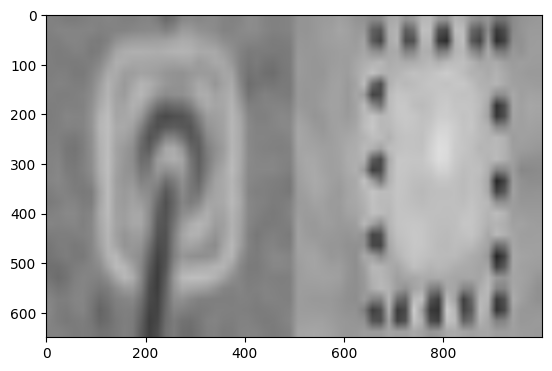

In [42]:
plt.imshow(final_img)

In [43]:
matches

()

In [44]:
from skimage.feature import match_template
from skimage.feature import peak_local_max

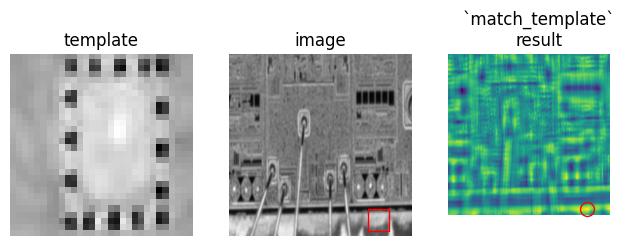

In [45]:
result = match_template(img1, im2c)

ij = np.unravel_index(np.argmax(result), result.shape)
x, y = ij[::-1]

fig = plt.figure(figsize=(8, 3))
ax1 = plt.subplot(1, 3, 1)
ax2 = plt.subplot(1, 3, 2)
ax3 = plt.subplot(1, 3, 3, sharex=ax2, sharey=ax2)

ax1.imshow(im2c, cmap=plt.cm.gray)
ax1.set_axis_off()
ax1.set_title('template')

ax2.imshow(img1, cmap=plt.cm.gray)
ax2.set_axis_off()
ax2.set_title('image')

h, w = img1.shape
rect = plt.Rectangle((x, y), 30, 30, edgecolor='r', facecolor='none')
ax2.add_patch(rect)

ax3.imshow(result)
ax3.set_axis_off()
ax3.set_title('`match_template`\nresult')
# highlight matched region
ax3.autoscale(False)
ax3.plot(x, y, 'o', markeredgecolor='r', markerfacecolor='none', markersize=10)

plt.show()

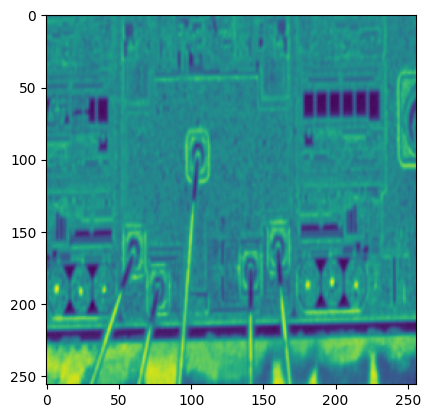

In [46]:
fig,ax = plt.subplots(1)
ax.imshow(img1)
for x, y in peak_local_max(result, threshold_abs=0.4,#, threshold_rel=0.8
                           exclude_border = 20):
    rect = plt.Rectangle((y, x), 30,30,
                          color='r', fc='none')
    #print(rect)
    ax.add_patch(rect)
plt.show()

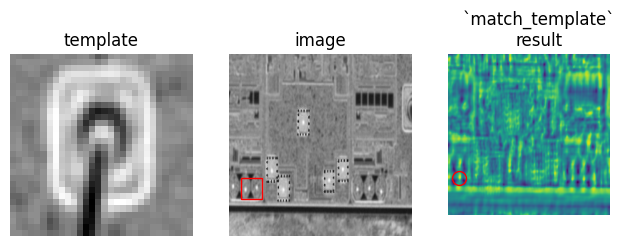

In [47]:
result = match_template(img3, im1c)

ij = np.unravel_index(np.argmax(result), result.shape)
x, y = ij[::-1]

fig = plt.figure(figsize=(8, 3))
ax1 = plt.subplot(1, 3, 1)
ax2 = plt.subplot(1, 3, 2)
ax3 = plt.subplot(1, 3, 3, sharex=ax2, sharey=ax2)

ax1.imshow(im1c, cmap=plt.cm.gray)
ax1.set_axis_off()
ax1.set_title('template')

ax2.imshow(img3, cmap=plt.cm.gray)
ax2.set_axis_off()
ax2.set_title('image')

h, w = img3.shape
rect = plt.Rectangle((x, y), 30, 30, edgecolor='r', facecolor='none')
ax2.add_patch(rect)

ax3.imshow(result)
ax3.set_axis_off()
ax3.set_title('`match_template`\nresult')
# highlight matched region
ax3.autoscale(False)
ax3.plot(x, y, 'o', markeredgecolor='r', markerfacecolor='none', markersize=10)

plt.show()

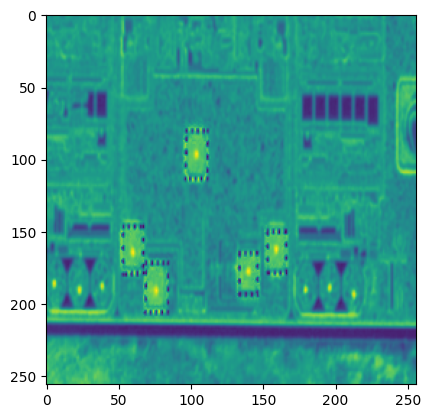

In [48]:
fig,ax = plt.subplots(1)
ax.imshow(img3)
for x, y in peak_local_max(result, threshold_abs=0.4, 
                           exclude_border = 20):
    rect = plt.Rectangle((y, x), 30,30,
                          color='r', fc='none')
    #print(rect)
    ax.add_patch(rect)
plt.show()

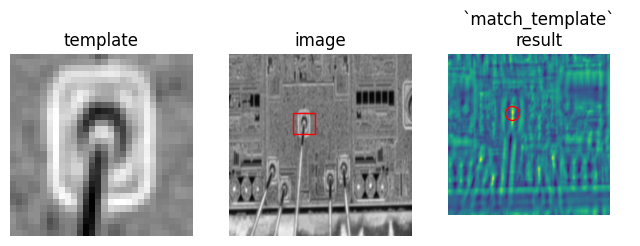

In [49]:
result = match_template(img1, im1c)
ij = np.unravel_index(np.argmax(result), result.shape)
x, y = ij[::-1]

fig = plt.figure(figsize=(8, 3))
ax1 = plt.subplot(1, 3, 1)
ax2 = plt.subplot(1, 3, 2)
ax3 = plt.subplot(1, 3, 3, sharex=ax2, sharey=ax2)

ax1.imshow(im1c, cmap=plt.cm.gray)
ax1.set_axis_off()
ax1.set_title('template')

ax2.imshow(img1, cmap=plt.cm.gray)
ax2.set_axis_off()
ax2.set_title('image')

h, w = img1.shape
rect = plt.Rectangle((x, y), 30, 30, edgecolor='r', facecolor='none')
ax2.add_patch(rect)

ax3.imshow(result)
ax3.set_axis_off()
ax3.set_title('`match_template`\nresult')
# highlight matched region
ax3.autoscale(False)
ax3.plot(x, y, 'o', markeredgecolor='r', markerfacecolor='none', markersize=10)

plt.show()

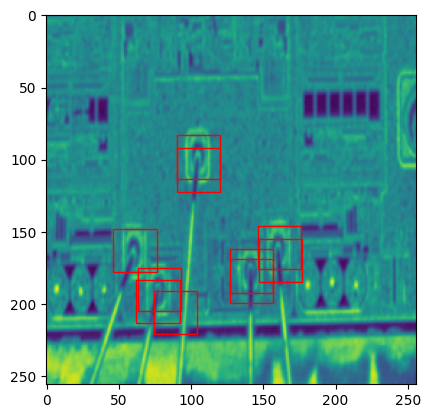

In [50]:
fig,ax = plt.subplots(1)
ax.imshow(img1)
for x, y in peak_local_max(result, threshold_abs=0.4, 
                           exclude_border = 20):
    rect = plt.Rectangle((y, x), 30,30,
                          color='r', fc='none')
    #print(rect)
    ax.add_patch(rect)
plt.show()

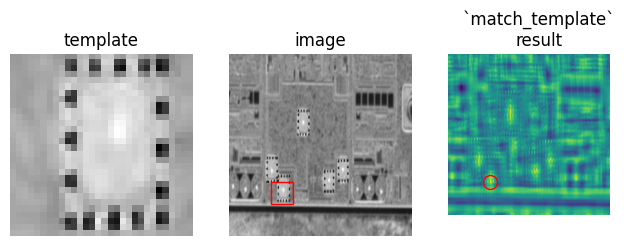

In [51]:
result = match_template(img3, im2c)
ij = np.unravel_index(np.argmax(result), result.shape)
x, y = ij[::-1]

fig = plt.figure(figsize=(8, 3))
ax1 = plt.subplot(1, 3, 1)
ax2 = plt.subplot(1, 3, 2)
ax3 = plt.subplot(1, 3, 3, sharex=ax2, sharey=ax2)

ax1.imshow(im2c, cmap=plt.cm.gray)
ax1.set_axis_off()
ax1.set_title('template')

ax2.imshow(img3, cmap=plt.cm.gray)
ax2.set_axis_off()
ax2.set_title('image')

h, w = img1.shape
rect = plt.Rectangle((x, y), 30, 30, edgecolor='r', facecolor='none')
ax2.add_patch(rect)

ax3.imshow(result)
ax3.set_axis_off()
ax3.set_title('`match_template`\nresult')
# highlight matched region
ax3.autoscale(False)
ax3.plot(x, y, 'o', markeredgecolor='r', markerfacecolor='none', markersize=10)

plt.show()

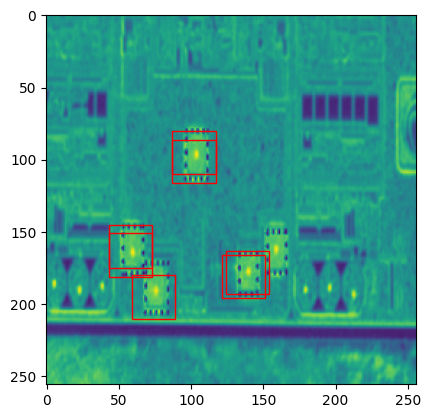

In [52]:
fig,ax = plt.subplots(1)
ax.imshow(img3)
for x, y in peak_local_max(result, threshold_abs=0.4, 
                           exclude_border = 20):
    rect = plt.Rectangle((y, x), 30,30,
                          color='r', fc='none')
    #print(rect)
    ax.add_patch(rect)
plt.show()

In [53]:
#plt.imshow(img1)

In [54]:
#plt.imshow(img1)

In [55]:
import cv2 as cv

4


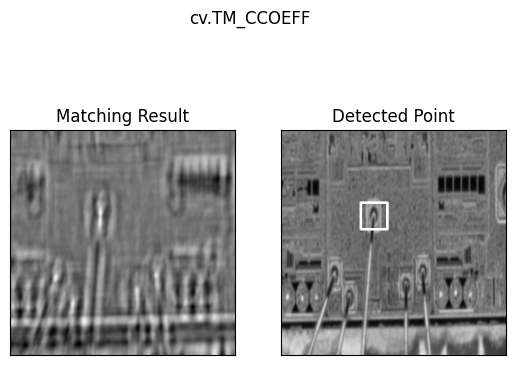

5


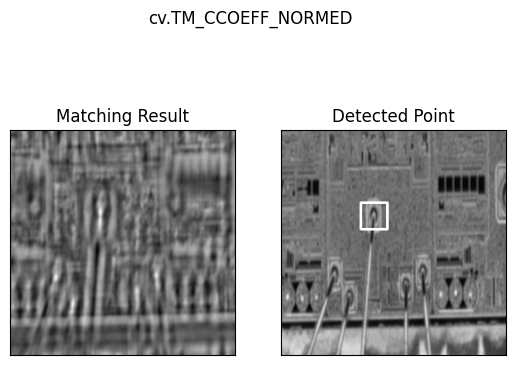

2


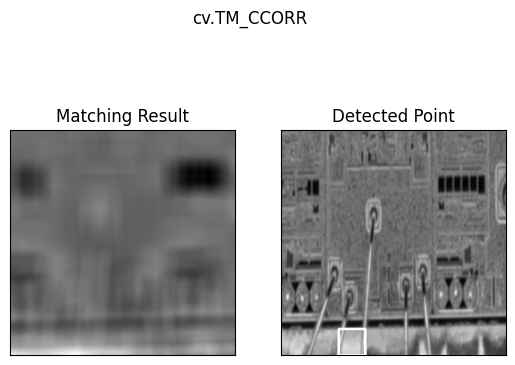

3


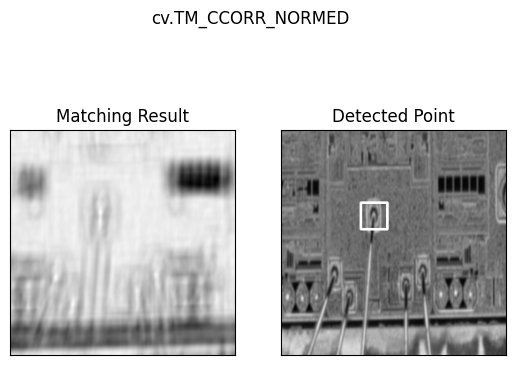

0


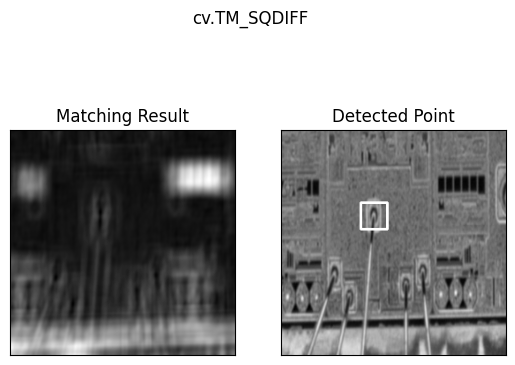

1


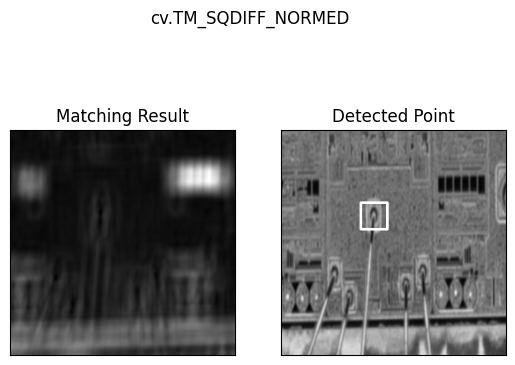

In [75]:
imgt = img1.copy()
template = im1c
w, h = template.shape[::-1]
# All the 6 methods for comparison in a list
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
 'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']
for meth in methods:
    img = imgt.copy()
    method = eval(meth)
    print(method)
    # Apply template Matching
    res = cv.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv.rectangle(img,top_left, bottom_right, 255, 2)
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()

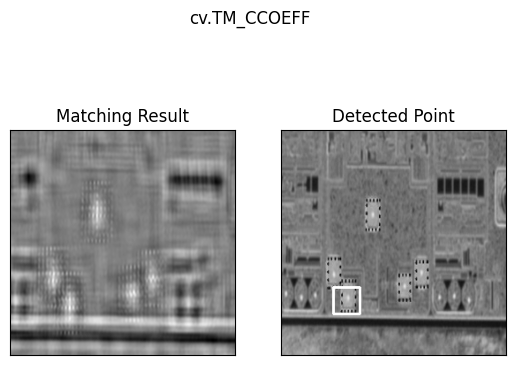

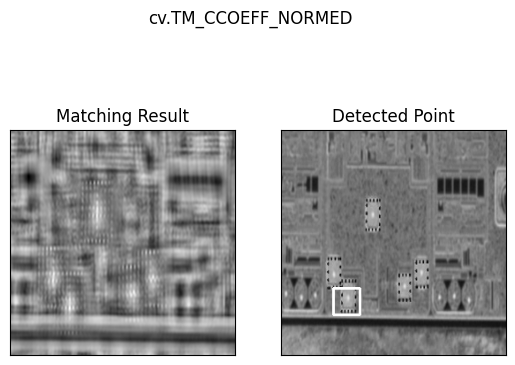

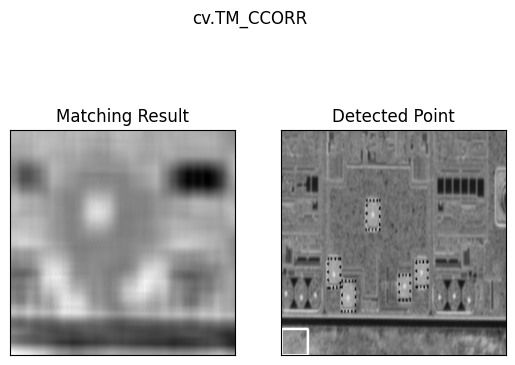

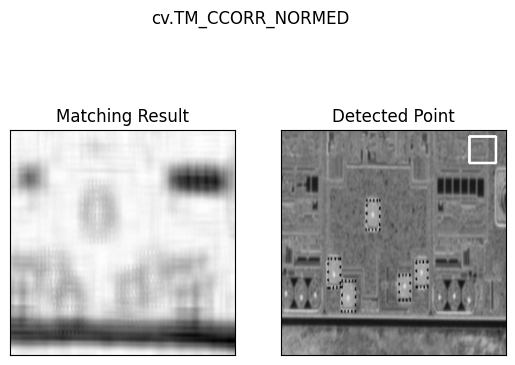

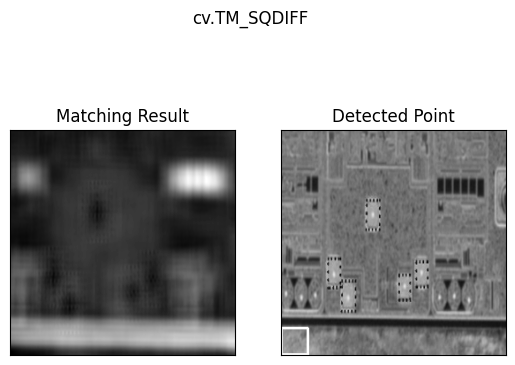

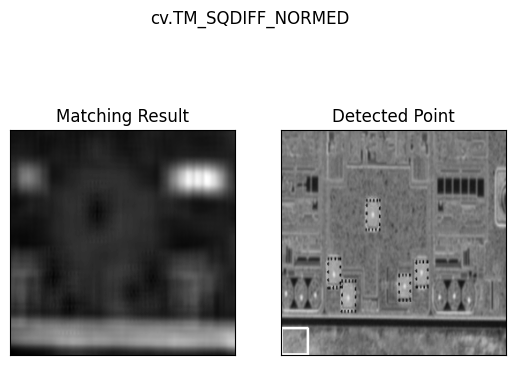

In [76]:
imgt = img3.copy()
template = im2c
w, h = template.shape[::-1]
# All the 6 methods for comparison in a list
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
 'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']
for meth in methods:
    img = imgt.copy()
    method = eval(meth)
    # Apply template Matching
    res = cv.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv.rectangle(img,top_left, bottom_right, 255, 2)
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()

In [58]:
imgt = img3.copy()
template = im2c

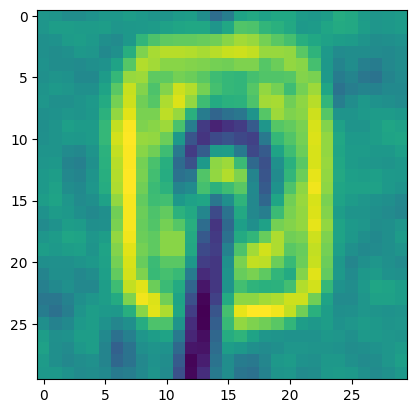

In [100]:
plt.imshow(template)

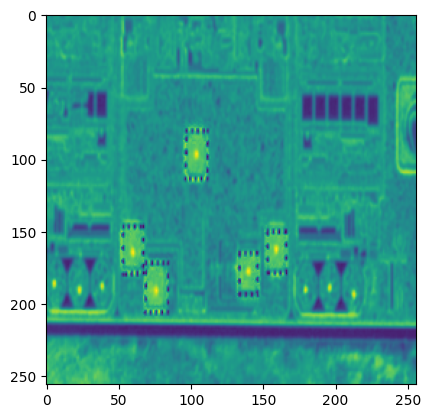

In [101]:
plt.imshow(imgt)

In [102]:
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
 'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']

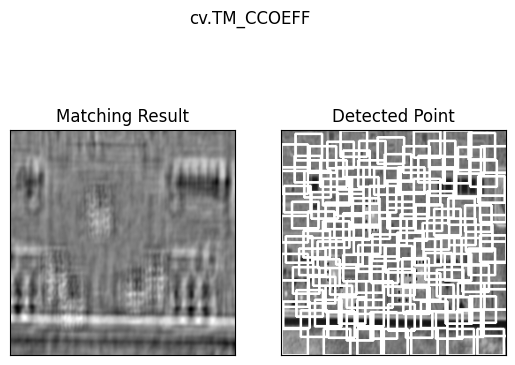

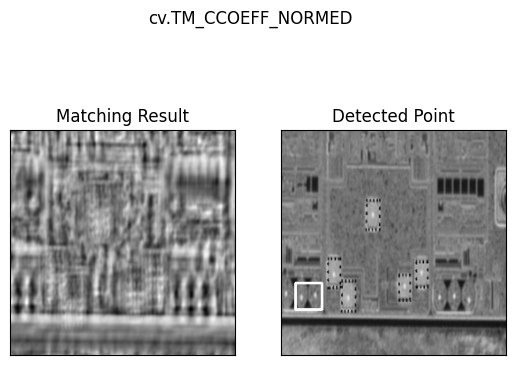

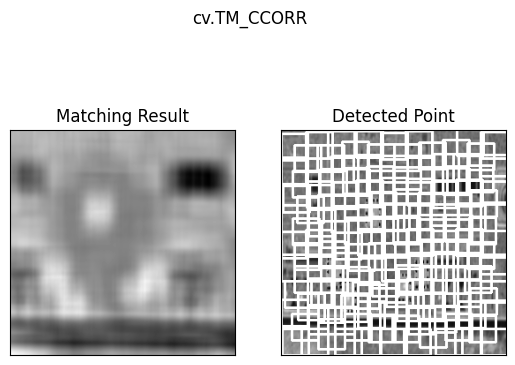

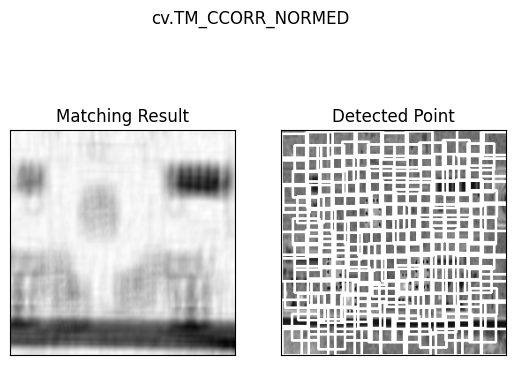

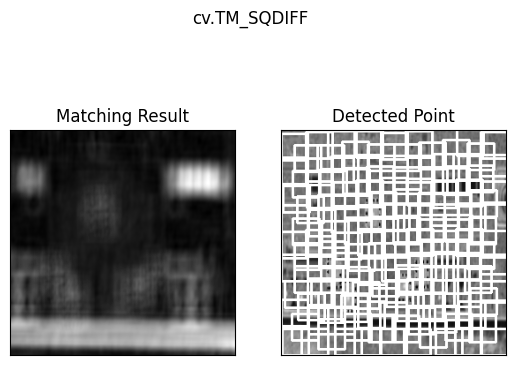

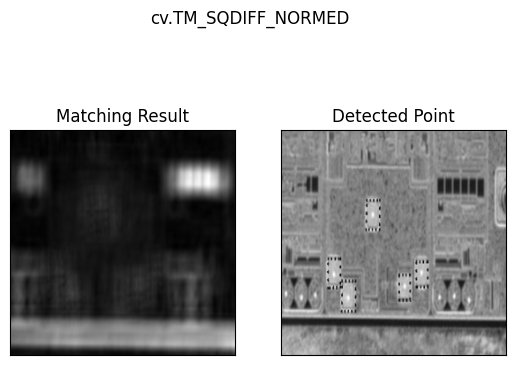

In [103]:
from imutils.object_detection import non_max_suppression 
thresh = 0.4
# Passing the image to matchTemplate method 
for meth in methods:
    img = imgt.copy()
    method = eval(meth)
    # Apply template Matching
    #print(method)
    match = cv2.matchTemplate(image=img, templ=template,method=method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    # Select rectangles with 
    # confidence greater than threshold 
    (y_points, x_points) = np.where(match >= thresh) 
    # initialize our list of rectangles 
    boxes = list() 
    # loop over the starting (x, y)-coordinates again 
    for (x, y) in zip(x_points, y_points): 
        # update our list of rectangles 
        boxes.append((x, y, x + w, y + h))
    #print(len(boxes))
    #apply non-maxima suppression to the rectangles 
    # this will create a single bounding box 
    boxes = non_max_suppression(np.array(boxes)) 
    # loop over the final bounding boxes 
    for (x1, y1, x2, y2) in boxes: 
        # draw the bounding box on the image 
        cv2.rectangle(img, (x1, y1), (x2, y2), 
                      (255, 0, 0), 2) 
    plt.subplot(121),plt.imshow(match,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()

In [129]:
img = imgt.copy()
#template = im2c
template = im1c

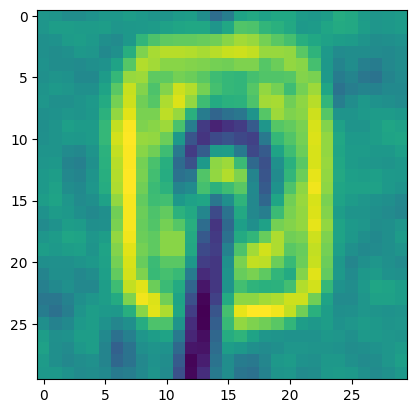

In [130]:
plt.imshow(template)

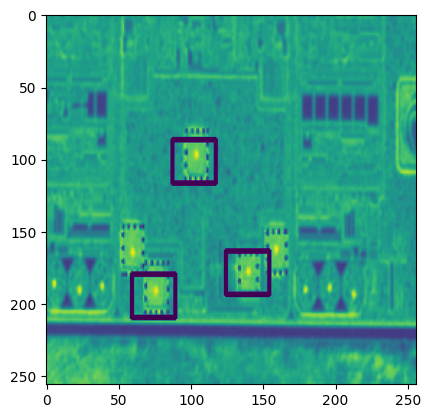

In [131]:
plt.imshow(img)

In [132]:
thresh = 0.45

(Text(0.5, 1.0, 'Detected Point'), ([], []), ([], []))

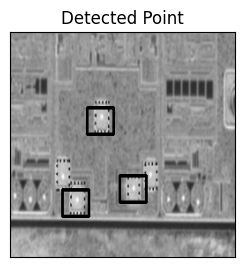

In [133]:
match = cv2.matchTemplate( 
    image=imgt, templ=template,  
  method=cv2.TM_CCOEFF_NORMED) 
  
# Select rectangles with 
# confidence greater than threshold 
(y_points, x_points) = np.where(match >= thresh) 
  
# initialize our list of rectangles 
boxes = list() 
  
# loop over the starting (x, y)-coordinates again 
for (x, y) in zip(x_points, y_points): 
    
    # update our list of rectangles 
    boxes.append((x, y, x + w, y + h)) 
boxes = non_max_suppression(np.array(boxes)) 
  
# loop over the final bounding boxes 
for (x1, y1, x2, y2) in boxes: 
    
    # draw the bounding box on the image 
    cv2.rectangle(img, (x1, y1), (x2, y2), 
                  (255, 0, 0), 2) 
plt.subplot(122),plt.imshow(img,cmap = 'gray')
plt.title('Detected Point'), plt.xticks([]), plt.yticks([])

In [67]:
match

array([[ 0.02292742,  0.03415521,  0.05321353, ..., -0.22583377,
        -0.15239932, -0.10086903],
       [ 0.00663504,  0.00218459,  0.00154304, ..., -0.23733541,
        -0.17551823, -0.11286076],
       [ 0.00111688, -0.01619527, -0.03076683, ..., -0.22567168,
        -0.17459203, -0.10616083],
       ...,
       [ 0.07865886,  0.07605042,  0.05433886, ...,  0.02411972,
         0.0131335 , -0.00908208],
       [ 0.02983415,  0.02714074,  0.00394497, ...,  0.05365566,
         0.04174613,  0.01808492],
       [-0.02198103, -0.01951736, -0.03750127, ...,  0.09817164,
         0.08529839,  0.06071224]], dtype=float32)

In [68]:
imgt = img1.copy()
template = im1c

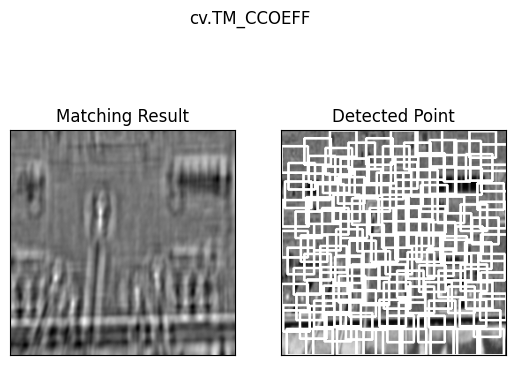

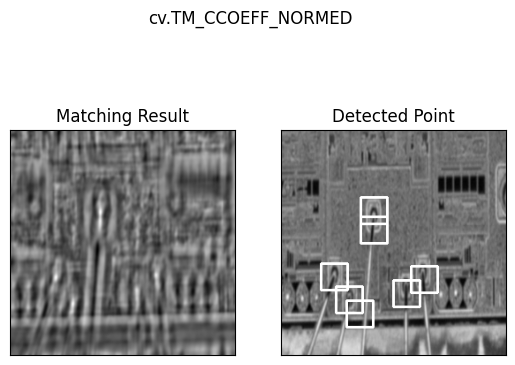

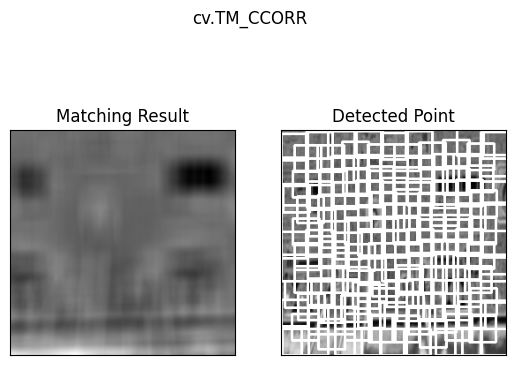

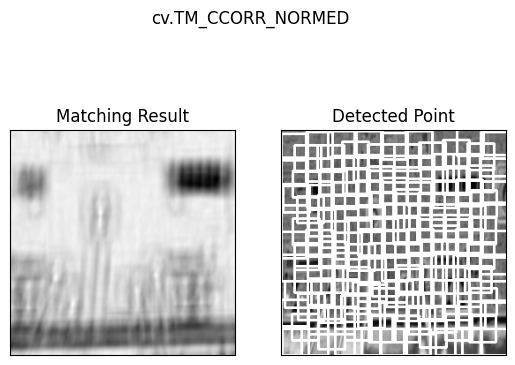

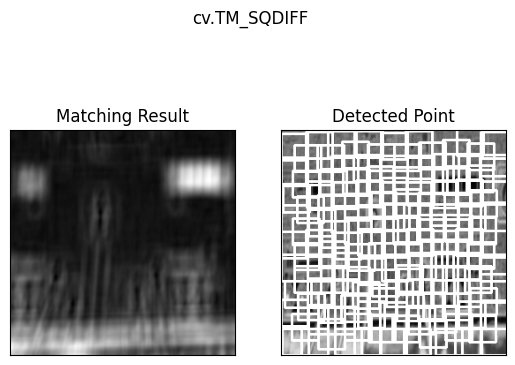

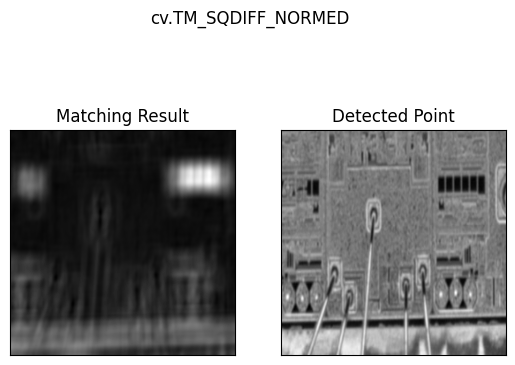

In [69]:
from imutils.object_detection import non_max_suppression 
thresh = 0.4
# Passing the image to matchTemplate method 
for meth in methods:
    img = imgt.copy()
    method = eval(meth)
    # Apply template Matching
    #print(method)
    match = cv2.matchTemplate(image=img, templ=template,method=method)
    #min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    #if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        #top_left = min_loc
    # Select rectangles with 
    # confidence greater than threshold 
    (y_points, x_points) = np.where(match >= thresh) 
    # initialize our list of rectangles 
    boxes = list() 
    # loop over the starting (x, y)-coordinates again 
    for (x, y) in zip(x_points, y_points): 
        # update our list of rectangles 
        boxes.append((x, y, x + w, y + h))
    #print(len(boxes))
    #apply non-maxima suppression to the rectangles 
    # this will create a single bounding box 
    boxes = non_max_suppression(np.array(boxes)) 
    # loop over the final bounding boxes 
    for (x1, y1, x2, y2) in boxes: 
        # draw the bounding box on the image 
        cv2.rectangle(img, (x1, y1), (x2, y2), 
                      (255, 0, 0), 2) 
    plt.subplot(121),plt.imshow(match,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()

In [125]:
imgt = img3.copy()
template = im2c

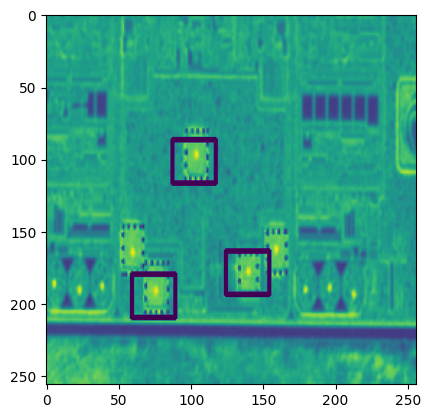

In [126]:
res = cv.matchTemplate(imgt,template,cv.TM_CCOEFF_NORMED)
threshold = 0.45
loc = np.where( res >= threshold)
for pt in zip(*loc[::-1]):
    cv.rectangle(imgt, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)
plt.imshow(imgt)

In [0]:
fig,ax = plt.subplots(1)
ax.imshow(img3)
for x, y in peak_local_max(result, threshold_abs=0.4, 
                           exclude_border = 20):
    rect = plt.Rectangle((y, x), 30,30,
                          color='r', fc='none')
    #print(rect)
    ax.add_patch(rect)
plt.show()